In [1]:
import numpy as np 
import pandas as pd

### Lets call data in work enviroment

In [2]:
df = pd.read_csv('autos.csv', encoding='latin-1')

### Look in data demography

In [3]:
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
df.ndim
# number of dimensions

2

In [5]:
df.shape
# 50000 rows and 20 columns

(50000, 20)

In [6]:
df.dtypes
# data type according to columns in raw dataset

dateCrawled            object
name                   object
seller                 object
offerType              object
price                  object
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
odometer               object
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [7]:
for col in df:
    print(col)
# columns presents in dataset

dateCrawled
name
seller
offerType
price
abtest
vehicleType
yearOfRegistration
gearbox
powerPS
model
odometer
monthOfRegistration
fuelType
brand
notRepairedDamage
dateCreated
nrOfPictures
postalCode
lastSeen


**so our dataset have 50,000 rows and 20 columns  
and most of columns have object data type and some of columns  
have int64 data type**

# Data Cleaning

### Messy columns name 
**changing messy columns name to more  
readable format**

In [8]:
df.rename(columns={'dateCrawled':'Date_Crawled',
                  'offerType':'Offer_Type',
                  'vehicleType':'Vehicle_Type',
                  'yearOfRegistration':'Year_of_Registration',
                  'monthOfRegistration':'Month_of_Registration',
                  'monthOfRegistration':'Month_of_Registration',
                  'notRepairedDamage':'Not_Repaired_Damage',
                  'dateCreated':'Date_Created',
                  'nrOfPictures':'Nr_of_Pictures',
                  'postalCode':'Postal_Code',
                  'lastSeen':'Last_Seen',
                  'fuelType':'Fuel_Type',
                  'powerPS':'Horse_power',
                  'name':'Name',
                  'seller':'Seller',
                  'price':'Price',
                  'abtest':'Abtest',
                  'gearbox':'Gearbox',
                  'model':'Model',
                  'odometer':'Odometer',
                  'fueltype':'Fuel_Type',
                  'brand':'Brand'},
         inplace=True)


### Inspecting null values inside data set

In [9]:
print(df.isnull().sum())
print('total null value cells inside dataset is',df.isnull().sum().sum())

Date_Crawled                0
Name                        0
Seller                      0
Offer_Type                  0
Price                       0
Abtest                      0
Vehicle_Type             5095
Year_of_Registration        0
Gearbox                  2680
Horse_power                 0
Model                    2758
Odometer                    0
Month_of_Registration       0
Fuel_Type                4482
Brand                       0
Not_Repaired_Damage      9829
Date_Created                0
Nr_of_Pictures              0
Postal_Code                 0
Last_Seen                   0
dtype: int64
total null value cells inside dataset is 24844


In [10]:
df.dropna(inplace=True)
print('total null value cells inside dataset is',df.isnull().sum().sum())

total null value cells inside dataset is 0


### Inspecting zero values inside data set

In [11]:
print((df==0).sum())
print('total zero value cells in datset is',(df==0).sum().sum())

Date_Crawled                 0
Name                         0
Seller                       0
Offer_Type                   0
Price                        0
Abtest                       0
Vehicle_Type                 0
Year_of_Registration         0
Gearbox                      0
Horse_power               1309
Model                        0
Odometer                     0
Month_of_Registration     1008
Fuel_Type                    0
Brand                        0
Not_Repaired_Damage          0
Date_Created                 0
Nr_of_Pictures           35047
Postal_Code                  0
Last_Seen                    0
dtype: int64
total zero value cells in datset is 37364


### inspecting for duplicated rows inside data

In [12]:
df.duplicated().sum()

0

### Removing data inaccuracies

In [13]:
df.head(5)

,Date_Crawled,Name,Seller,Offer_Type,Price,Abtest,Vehicle_Type,Year_of_Registration,Gearbox,Horse_power,Model,Odometer,Month_of_Registration,Fuel_Type,Brand,Not_Repaired_Damage,Date_Created,Nr_of_Pictures,Postal_Code,Last_Seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### Correcting misspelled Data 
**some columns have mispelled data
so we going to spelled them correct  
and also converting german words into english**

In [14]:
for col in df:
    print(col)
    print(df[col].unique())
    print('----------------------------------------------------------------------------------')

Date_Crawled
['2016-03-26 17:47:46' '2016-04-04 13:38:56' '2016-03-26 18:57:24' ...
 '2016-04-02 14:44:48' '2016-03-08 19:25:42' '2016-03-14 00:42:12']
----------------------------------------------------------------------------------
Name
['Peugeot_807_160_NAVTECH_ON_BOARD'
 'BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik' 'Volkswagen_Golf_1.6_United'
 ... 'Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+Reifen_neu_!!'
 'Fiat_500_C_1.2_Dualogic_Lounge' 'Opel_Vectra_1.6_16V']
----------------------------------------------------------------------------------
Seller
['privat']
----------------------------------------------------------------------------------
Offer_Type
['Angebot']
----------------------------------------------------------------------------------
Price
['$5,000' '$8,500' '$8,990' ... '$145,000' '$385' '$16,995']
----------------------------------------------------------------------------------
Abtest
['control' 'test']
-----------------------------------------------------------

In [15]:
print('Unique values presents in different columns and checking for missplled')
print('Seller column-->      ',df.Seller.unique())
print('Offer_Type column-->  ',df.Offer_Type.unique())
print('Abtest column-->      ',df.Abtest.unique())
print('Vehicle_Type column-->',df.Vehicle_Type.unique())
print('Gearbox column-->     ',df.Gearbox.unique())
print('Fuel_Type column-->   ',df.Fuel_Type.unique())


Unique values presents in different columns and checking for missplled
Seller column-->       ['privat']
Offer_Type column-->   ['Angebot']
Abtest column-->       ['control' 'test']
Vehicle_Type column--> ['bus' 'limousine' 'kleinwagen' 'kombi' 'coupe' 'suv' 'cabrio' 'andere']
Gearbox column-->      ['manuell' 'automatik']
Fuel_Type column-->    ['lpg' 'benzin' 'diesel' 'cng' 'hybrid' 'elektro' 'andere']


### Changing misspelled data 

In [16]:
df.replace({'Seller':{'privat':'Private','gewerblich':'Commercial'},
           'Offer_Type':{'Angebot':'Proposal','Gesuch':'Wanted'},
           'Gearbox':{'manuell':'Manual','automatik':'Automatic'},
           'Not_Repaired_Damage':{'nein':'No','ja':'Yes'},
           'Fuel_Type':{'elektro':'electronic','andere':'other','benzin':'petrol'},
           'Vehicle_Type':{'andere':'other'}},inplace=True)

### correct words

In [17]:
print('Correct right spelled data')
print('Seller column-->             ',df.Seller.unique())
print('Offer_Type column-->         ',df.Offer_Type.unique())
print('Abtest column-->             ',df.Abtest.unique())
print('Vehicle_Type column-->       ',df.Vehicle_Type.unique())
print('Gearbox column-->            ',df.Gearbox.unique())
print('Fuel_Type column-->          ',df.Fuel_Type.unique())
print('Not_Repaired_Damage column-->',df.Not_Repaired_Damage.unique())

Correct right spelled data
Seller column-->              ['Private']
Offer_Type column-->          ['Proposal']
Abtest column-->              ['control' 'test']
Vehicle_Type column-->        ['bus' 'limousine' 'kleinwagen' 'kombi' 'coupe' 'suv' 'cabrio' 'other']
Gearbox column-->             ['Manual' 'Automatic']
Fuel_Type column-->           ['lpg' 'petrol' 'diesel' 'cng' 'hybrid' 'electronic' 'other']
Not_Repaired_Damage column--> ['No' 'Yes']


### Capitalizing column values

In [18]:
df['Brand'] = df['Brand'].map(str.title)
df['Abtest'] = df['Abtest'].map(str.title)
df['Fuel_Type'] = df['Fuel_Type'].str.title()
df['Model'] = df['Model'].str.title()
df['Vehicle_Type'] = df['Vehicle_Type'].str.title()

df.replace({'Brand':{'Bmw':'BMW'}}, inplace =True)

### Splitting datetime columns in date and time

In [19]:
df['Date_of_crawled'] = pd.to_datetime(df['Date_Crawled']).dt.date
df['Time_of_crawled'] = pd.to_datetime(df['Date_Crawled']).dt.time
df['Date_of_last_seen'] = pd.to_datetime(df['Last_Seen']).dt.date
df['Time_of_last_seen'] = pd.to_datetime(df['Last_Seen']).dt.time

df['Year_of_Registration'] = pd.to_datetime(df.Year_of_Registration, format='%Y').dt.year

### Replacing string literal from price column and converting it into int

In [20]:
df['Price_in_dollars'] = df['Price'].str.replace(',', '').str.replace('$', '')
df['Odometer'] = df['Odometer'].str.replace(',', '').str.replace('km','')

C:\Users\admin\AppData\Local\Temp\ipykernel_3476\182771494.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price_in_dollars'] = df['Price'].str.replace(',', '').str.replace('$', '')


### Dropping Uneccessary columns

In [21]:
df.drop(columns=['Date_Crawled','Date_Created','Nr_of_Pictures','Last_Seen','Price'],inplace=True)
df['Price_Unit'] = '$'
df['Odometer_unit'] = 'Km'

### Data Type conversions 

In [22]:
df[['Odometer','Price_in_dollars']] = df[['Odometer','Price_in_dollars']].astype("int64")


In [23]:
df.dtypes

Name                     object
Seller                   object
Offer_Type               object
Abtest                   object
Vehicle_Type             object
Year_of_Registration      int64
Gearbox                  object
Horse_power               int64
Model                    object
Odometer                  int64
Month_of_Registration     int64
Fuel_Type                object
Brand                    object
Not_Repaired_Damage      object
Postal_Code               int64
Date_of_crawled          object
Time_of_crawled          object
Date_of_last_seen        object
Time_of_last_seen        object
Price_in_dollars          int64
Price_Unit               object
Odometer_unit            object
dtype: object

### Reseting index

In [24]:
df.reset_index(drop=True, inplace=True)

### Reseting columns to desired output

In [25]:
df.columns

Index(['Name', 'Seller', 'Offer_Type', 'Abtest', 'Vehicle_Type',
       'Year_of_Registration', 'Gearbox', 'Horse_power', 'Model', 'Odometer',
       'Month_of_Registration', 'Fuel_Type', 'Brand', 'Not_Repaired_Damage',
       'Postal_Code', 'Date_of_crawled', 'Time_of_crawled',
       'Date_of_last_seen', 'Time_of_last_seen', 'Price_in_dollars',
       'Price_Unit', 'Odometer_unit'],
      dtype='object')

In [26]:
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,-3,-2,9,-1,10,11,12,13,14,15,16,17,18]]

# Descriptive analysis

In [27]:
df.describe().round(1)

,Year_of_Registration,Horse_power,Price_in_dollars,Odometer,Month_of_Registration,Postal_Code
count,35047.0,35047.0,35047.0,35047.0,35047.0,35047.0
mean,2003.4,127.4,7442.6,124172.8,6.2,51778.7
std,6.5,182.5,89491.4,39725.8,3.5,25809.2
min,1931.0,0.0,0.0,5000.0,0.0,1067.0
25%,1999.0,80.0,1500.0,100000.0,3.0,31199.0
50%,2004.0,116.0,3800.0,150000.0,6.0,51063.0
75%,2008.0,150.0,8600.0,150000.0,9.0,72760.0
max,2018.0,17700.0,12345678.0,150000.0,12.0,99998.0


### Top 5 Most expensive brand car sell on ebay till date

In [28]:
df.groupby(['Brand','Year_of_Registration']).agg({'Price_in_dollars':np.max}).sort_values(by='Price_in_dollars',ascending=False).head(5)

Price_in_dollars
Brand      Year_of_Registration                  
Opel       2001                          12345678
Ford       1973                          11111111
           2009                            999999
Volkswagen 1985                            999990
Porsche    2016                            350000

### 

### Which brand has more horsepower

In [29]:
df.groupby('Brand').agg({'Horse_power':np.max}).sort_values(by='Horse_power',ascending=False).head(5)

,Horse_power
Brand,
BMW,17700
Audi,16312
Ford,15001
Renault,7511
Smart,6226


### Most sellable brand over ebay

In [30]:
df.groupby('Brand')['Name'].count().sort_values(ascending=False).head(5)

Brand
Volkswagen       7239
BMW              4097
Opel             3592
Mercedes_Benz    3587
Audi             3208
Name: Name, dtype: int64

### In which Month the maximum sale happens

In [31]:
df.groupby(pd.DatetimeIndex(df['Date_of_last_seen']).month)['Name'].count().sort_values(ascending=False)

Date_of_last_seen
4    20930
3    14117
Name: Name, dtype: int64

### Which brand generating maximum value for ebay

In [32]:
import matplotlib.pyplot as plt

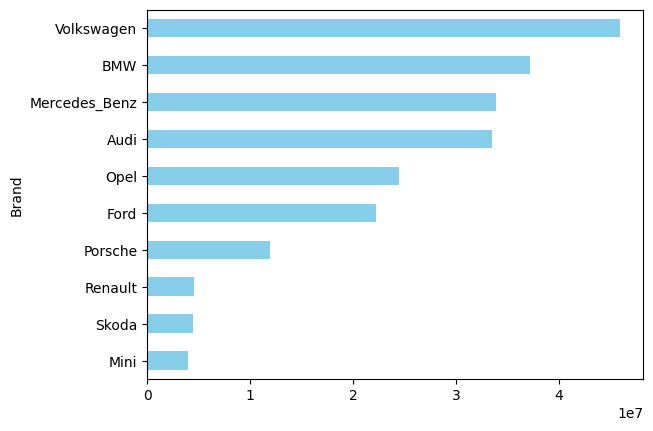

In [33]:
df.groupby('Brand')['Price_in_dollars'].sum().sort_values(ascending=True).tail(10).plot.barh(color='skyblue')
plt.yticks(fontsize=10)
plt.show()

# Volkswagen is the key player for eBay